In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy

from scipy.special import erfinv
from scipy.special import loggamma
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
from scipy.interpolate import interp1d
import sys
import math
import seaborn as sns
import inspect
from scipy import stats
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec


from matplotlib.colors import LogNorm
import statsmodels
import statsmodels.api as sm
from matplotlib.image import NonUniformImage
import re

In [2]:
# plotting params
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8.0,6.0]

colors = sns.color_palette("colorblind", 12)
colors1 = sns.color_palette("magma",3)
colors2 = sns.color_palette("magma",3)

# load data
data = pd.read_csv("../theory/old_files/results/spatial_integrals_dim2.csv")
data_pr = pd.read_csv("../theory/old_files/results/cleaned_data_dim2_errorFalse.csv")
data_pr = data_pr.loc[data_pr['poly_type'] == '1_1']

w_vals = data['w'].tolist()
res_vals = data_pr['residues']
pole_vals = data_pr['poles']

In [3]:
# functions
def poles(w,w_vals,pole_vals):
    f=interp1d(w_vals,pole_vals,fill_value="extrapolate")
    return(f(w))

def residues(w,w_vals, res_vals):
    res_vals=[-1*x for x in res_vals]
    f = interp1d(w_vals,res_vals,fill_value="extrapolate")
    return (f(w))

def get_gammae(w,s,w_vals,pole_vals,N=10000,D=1,d=1):
    l_c=np.sqrt(D/s)
    return(s*N*(l_c**d)*poles(w/l_c,w_vals,pole_vals))

def get_thetae(w,s,w_vals,res_vals,mu=1e-8,N=10000,D=1,d=1):
    l_c = np.sqrt(D / s)
    return(mu*N*(l_c**d)*residues(w/l_c,w_vals,res_vals))

def finite_sfs_k(n,k,w,s,w_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = get_gammae(w,s,w_vals,pole_vals,N,D,d)
    thetae = get_thetae(w,s,w_vals,res_vals,mu,N,D,d)
    logval = k*np.log(n)+thetae*np.log(gammae)-(k+thetae)*np.log(n+gammae)+loggamma(k+thetae)-loggamma(k+1)-loggamma(thetae)
    return(np.e**logval)

def finite_sfs_allelefreq(n,w,s,w_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = get_gammae(w,s,w_vals,pole_vals,N,D,d)
    thetae = get_thetae(w,s,w_vals,res_vals,mu,N,D,d)
    return thetae/gammae

def finite_sfs_het(n,w,s,w_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = get_gammae(w,s,w_vals,pole_vals,N,D,d)
    thetae = get_thetae(w,s,w_vals,res_vals,mu,N,D,d)
    return (2*thetae/gammae)*(1-(gammae+n+n*thetae)/(n*gammae))

def finite_sfs_segsites(n,w,s,w_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = get_gammae(w,s,w_vals,pole_vals,N,D,d)
    thetae = get_thetae(w,s,w_vals,res_vals,mu,N,D,d)
    return 1-(gammae/(gammae+n))**thetae

In [4]:
color_palette_original = [
    "#003f5c",
    "#2f4b7c",
    "#665191",
    "#a05195",
    "#d45087",
    "#f95d6a",
    "#ff7c43",
    "#ffa600"
]

In [105]:
slim_data = pd.read_csv("../simulations/results_Dec2023/summary_df_norecap_dec2023.tsv", sep="\t")
slim_data = slim_data[slim_data['f_per_kb'] != 0]

slim_data_s_01 = slim_data[slim_data['s'] == -0.1]
slim_data_s_001 = slim_data[slim_data['s'] == -0.01]
slim_data_s_0001 = slim_data[slim_data['s'] == -0.001]

w_vals_slim = slim_data_s_01['width'].unique()
w_vals_slim = np.sort(w_vals_slim)
vals_to_plot = [w_vals_slim[1],w_vals_slim[-4]]

# mu = 1e-10
# mu = 9e-10
mu = 1e-9
nval = 1000
dens = 5/(1/.06)
Dval = 1
s_list = [0.1,0.01,0.001]
# s_list = [s/2 for s in s_list]
# s_list_slim = [s/2 for s in s_list]
w_vals_plot2 = [4.08*x for x in vals_to_plot]
# w_vals_plot2[1] = 500
# w_vals_plot2 = [4.08*6.1237,4.08*100]#[4.08*1.225,4.08*100]
kmax=1000
step=1

colors = [color_palette_original[1],color_palette_original[6]]


In [54]:
vals_to_plot

[1.224744871391589, 45.31556024148879]

<ipython-input-106-03a3937f3069>:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[0].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=col_temp, label=lab_temp, marker='^',linestyle='dashed')
<ipython-input-106-03a3937f3069>:22: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[1].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=col_temp, label=lab_temp, marker='^',linestyle='dashed')
<ipython-input-106-03a3937f3069>:36: FutureWarning: The behavio

Text(0.5, 1.0, 's=0.001')

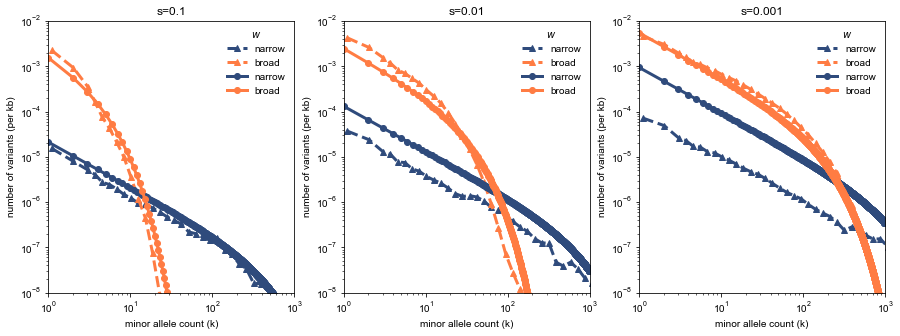

In [106]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

for width in vals_to_plot:
    sfs_data = slim_data_s_01
    sfs_temp = sfs_data[sfs_data['width'] == width]
    col_temp = colors[0] if width == vals_to_plot[0] else colors[1]
    lab_temp = "narrow" if width == vals_to_plot[0] else "broad"
    axs[0].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=col_temp, label=lab_temp, marker='^',linestyle='dashed')
    axs[0].set_xscale("log")
    axs[0].set_yscale("log")
    axs[0].set_ylim(1e-8, 1e-2)
    axs[0].set_xlim(1e0,1e3)
#     axs[0].set_title("Site frequency spectrum,\nsimulation (n=1e4, s="+str(s_list[0])+")")
    axs[0].set_xlabel("minor allele count (k)")
    axs[0].set_ylabel("number of variants (per kb)")
#     axs[0].legend(title=r"$w$", frameon=False)
    
    sfs_data = slim_data_s_001
    sfs_temp = sfs_data[sfs_data['width'] == width]
    col_temp = colors[0] if width == vals_to_plot[0] else colors[1]
    lab_temp = "narrow" if width == vals_to_plot[0] else "broad"
    axs[1].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=col_temp, label=lab_temp, marker='^',linestyle='dashed')
    axs[1].set_xscale("log")
    axs[1].set_yscale("log")
    axs[1].set_ylim(1e-8, 1e-2)
    axs[1].set_xlim(1e0,1e3)
#     axs[1].set_title("Site frequency spectrum,\nsimulation (n=1e4, s="+str(s_list[1])+")")
    axs[1].set_xlabel("minor allele count (k)")
    axs[1].set_ylabel("number of variants (per kb)")
#     axs[1].legend(title=r"$w$", frameon=False)

    sfs_data = slim_data_s_0001
    sfs_temp = sfs_data[sfs_data['width'] == width]
    col_temp = colors[0] if width == vals_to_plot[0] else colors[1]
    lab_temp = "narrow" if width == vals_to_plot[0] else "broad"
    axs[2].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=col_temp, label=lab_temp, marker='^',linestyle='dashed')
    axs[2].set_xscale("log")
    axs[2].set_yscale("log")
    axs[2].set_ylim(1e-8, 1e-2)
    axs[2].set_xlim(1e0,1e3)
#     axs[2].set_title("Site frequency spectrum,\nsimulation (n=1e4, s="+str(s_list[1])+")")
    axs[2].set_xlabel("minor allele count (k)")
    axs[2].set_ylabel("number of variants (per kb)")
#     axs[2].legend(title=r"$w$", frameon=False)

numbp=2897694168
    
sfs_w0 = [finite_sfs_k(nval, k, w_vals_plot2[0], s_list[0], w_vals, pole_vals, res_vals, D=Dval, N=dens, mu=mu)*1e3 for k in range(0, kmax, step)]
sfs_w1 = [finite_sfs_k(nval, k, w_vals_plot2[1], s_list[0], w_vals, pole_vals, res_vals, D=Dval, N=dens, mu=mu)*1e3 for k in range(0, kmax, step)]

axs[0].plot(range(0, kmax, step), sfs_w0, label="narrow", marker='o', color=colors[0])
axs[0].plot(range(0, kmax, step), sfs_w1, label="broad", marker='o', color=colors[1])
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_ylim(1e-8, 1e-2)
axs[0].set_xlim(1e0,1e3)
axs[0].legend(title=r"$w$", frameon=False)
# axs[0].set_title("Site frequency spectrum,\ntheory (n=1e4, s="+str(s_list[0])+")")
axs[0].set_xlabel("minor allele count (k)")
axs[0].set_ylabel("number of variants (per kb)")


sfs_w0 = [finite_sfs_k(nval, k, w_vals_plot2[0], s_list[1], w_vals, pole_vals, res_vals, D=Dval, N=dens, mu=mu)*1e3 for k in range(0, kmax, step)]
sfs_w1 = [finite_sfs_k(nval, k, w_vals_plot2[1], s_list[1], w_vals, pole_vals, res_vals, D=Dval, N=dens, mu=mu)*1e3 for k in range(0, kmax, step)]

axs[1].plot(range(0, kmax, step), sfs_w0, label="narrow", marker='o', color=colors[0])
axs[1].plot(range(0, kmax, step), sfs_w1, label="broad", marker='o', color=colors[1])
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_ylim(1e-8, 1e-2)
axs[1].set_xlim(1e0,1e3)
axs[1].legend(title=r"$w$", frameon=False)
# axs[1].set_title("Site frequency spectrum, \ntheory (n=1e4, s="+str(s_list[1])+")")
axs[1].set_xlabel("minor allele count (k)")
axs[1].set_ylabel("number of variants (per kb)")


sfs_w0 = [finite_sfs_k(nval, k, w_vals_plot2[0], s_list[2], w_vals, pole_vals, res_vals, D=Dval, N=dens, mu=mu)*1e3 for k in range(0, kmax, step)]
sfs_w1 = [finite_sfs_k(nval, k, w_vals_plot2[1], s_list[2], w_vals, pole_vals, res_vals, D=Dval, N=dens, mu=mu)*1e3 for k in range(0, kmax, step)]

axs[2].plot(range(0, kmax, step), sfs_w0, label="narrow", marker='o', color=colors[0])
axs[2].plot(range(0, kmax, step), sfs_w1, label="broad", marker='o', color=colors[1])
axs[2].set_xscale("log")
axs[2].set_yscale("log")
axs[2].set_ylim(1e-8, 1e-2)
axs[2].set_xlim(1e0,1e3)
axs[2].legend(title=r"$w$", frameon=False)
# axs[2].set_title("Site frequency spectrum, \ntheory (n=1e4, s="+str(s_list[1])+")")
axs[2].set_xlabel("minor allele count (k)")
axs[2].set_ylabel("number of variants (per kb)")

axs[0].set_title("s="+str(s_list[0]))
axs[1].set_title("s="+str(s_list[1]))
axs[2].set_title("s="+str(s_list[2]))